In [27]:
source('../../helper/PRS_residuals_misc.R')
source('performance_plot_misc.R')


In [2]:
repo_root <- normalizePath('../../')
out_dir <- 'biomarker_paper'


In [3]:
dataset_list <- list(
#     'snpnet_biomarker' = c('biomarkers_20190407', 'biomarkers_20190407_multi_ethnic')
    'snpnet_biomarker' = c('biomarkers_20190407')    
)

final_list <- fread(
    'list_of_phes.txt', head=FALSE
)
colnames(final_list) <- c('GBE_ID')


In [4]:
df <- dataset_list %>% read_all_data(repo_root) %>% 
inner_join(final_list) %>% 
replace_na(list(Population = 'white_british')) %>%
select(-method, -PRS_model, -dataset_name, -dataset_version, -dataset_full)


Joining, by = "GBE_ID"


In [5]:
df %>% dim() %>% print()
df %>% select(GBE_ID) %>% unique() %>% count() %>% print()


[1] 570   5
# A tibble: 1 x 1
      n
  <int>
1    38


In [6]:
df_tabulated_full <- df %>% tabulate_df()


In [7]:
p1 <- df %>% plot_bar_performance()


In [8]:
p2 <- df_tabulated_full %>% plot_trans_ethnic_delta()


In [9]:
task_INT <- 'snpnet_biomarker_PRS/biomarkers_20190407_INT'
task     <- 'snpnet_biomarker_PRS/biomarkers_20190407'

covar_df <- file.path(
    '/oak/stanford/groups/mrivas/users/ytanigaw', 
    '/repos/rivas-lab/PRS/notebook/', 
    '20190406_biomarker_covar/biomarker_covar.tsv'
) %>% fread(data.table=F)


In [10]:
filenames_list <- list()
filenames_INT_list <- list()
data_list <- list()
data_INT_list <- list()

In [11]:
phe_name <- 'Lipoprotein_A'
rda_iter <- 100

this_phe_name_INT <- paste0(phe_name, '.adjust.statins')
this_phe_name <- paste0(phe_name, '_adjstatins')

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)

[1] "correlation: 0.74878588251925"
[1] "correlation: 0.680159133329576"


In [12]:
phe_name <- 'LDL_direct'
rda_iter <- 35

this_phe_name_INT <- paste0(phe_name, '.adjust.statins')
this_phe_name <- paste0(phe_name, '_adjstatins')

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)

[1] "correlation: 0.427708314905197"
[1] "correlation: 0.449175432626993"


In [13]:
phe_name <- 'Glycated_haemoglobin_HbA1c'
rda_iter <- 25

this_phe_name_INT <- paste0(phe_name, '.adjust.statins')
this_phe_name <- paste0(phe_name, '_adjstatins')

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)


[1] "correlation: 0.238299602796287"
[1] "correlation: 0.38395210785428"


In [14]:
phe_name <- 'Glucose'
rda_iter <- 13

this_phe_name_INT <- phe_name
this_phe_name <- phe_name

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)

[1] "correlation: 0.106458851463162"
[1] "correlation: 0.196656212626033"


In [15]:
phe_name <- 'Cystatin_C'
rda_iter <- 36

this_phe_name_INT <- paste0(phe_name, '.adjust.statins')
this_phe_name <- paste0(phe_name, '_adjstatins')

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)


[1] "correlation: 0.286638798108959"
[1] "correlation: 0.397448675299385"


In [16]:
phe_name <- 'Alanine_aminotransferase'
rda_iter <- 20

this_phe_name_INT <- paste0(phe_name, '.adjust.statins')
this_phe_name <- paste0(phe_name, '_adjstatins')

filenames_list[[phe_name]] <- get_file_names(task, this_phe_name, rda_iter = rda_iter)
filenames_INT_list[[phe_name]] <- get_file_names(task_INT, this_phe_name_INT)

data_list[[phe_name]] <- read_data_with_covars(
    filenames_list[[phe_name]][['phe']], filenames_list[[phe_name]][['score']], 
    filenames_list[[phe_name]][['rda']], covar_df, filenames_list[[phe_name]][['covar_beta']], 
    filenames_list[[phe_name]][['test']]
)
data_INT_list[[phe_name]] <- read_data(
    filenames_INT_list[[phe_name]][['phe']], filenames_INT_list[[phe_name]][['score']], filenames_INT_list[[phe_name]][['test']]
)


[1] "correlation: 0.160500730047709"
[1] "correlation: 0.23315346490198"


In [17]:
names(data_list)

[1] "Lipoprotein_A"              "LDL_direct"                
[3] "Glycated_haemoglobin_HbA1c" "Glucose"                   
[5] "Cystatin_C"                 "Alanine_aminotransferase"

Warning message:
“Removed 1680 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 107 rows containing missing values (geom_hex).”Warning message:
“Removed 12001 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 88 rows containing missing values (geom_hex).”Warning message:
“Removed 1579 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 3 rows containing missing values (geom_hex).”Warning message:
“Removed 2704 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 1 rows containing missing values (geom_hex).”Warning message:
“Removed 60209 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 47 rows containing missing values (geom_hex).”Warning message:
“Removed 1755 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 30 rows containing missing values (geom_hex).”

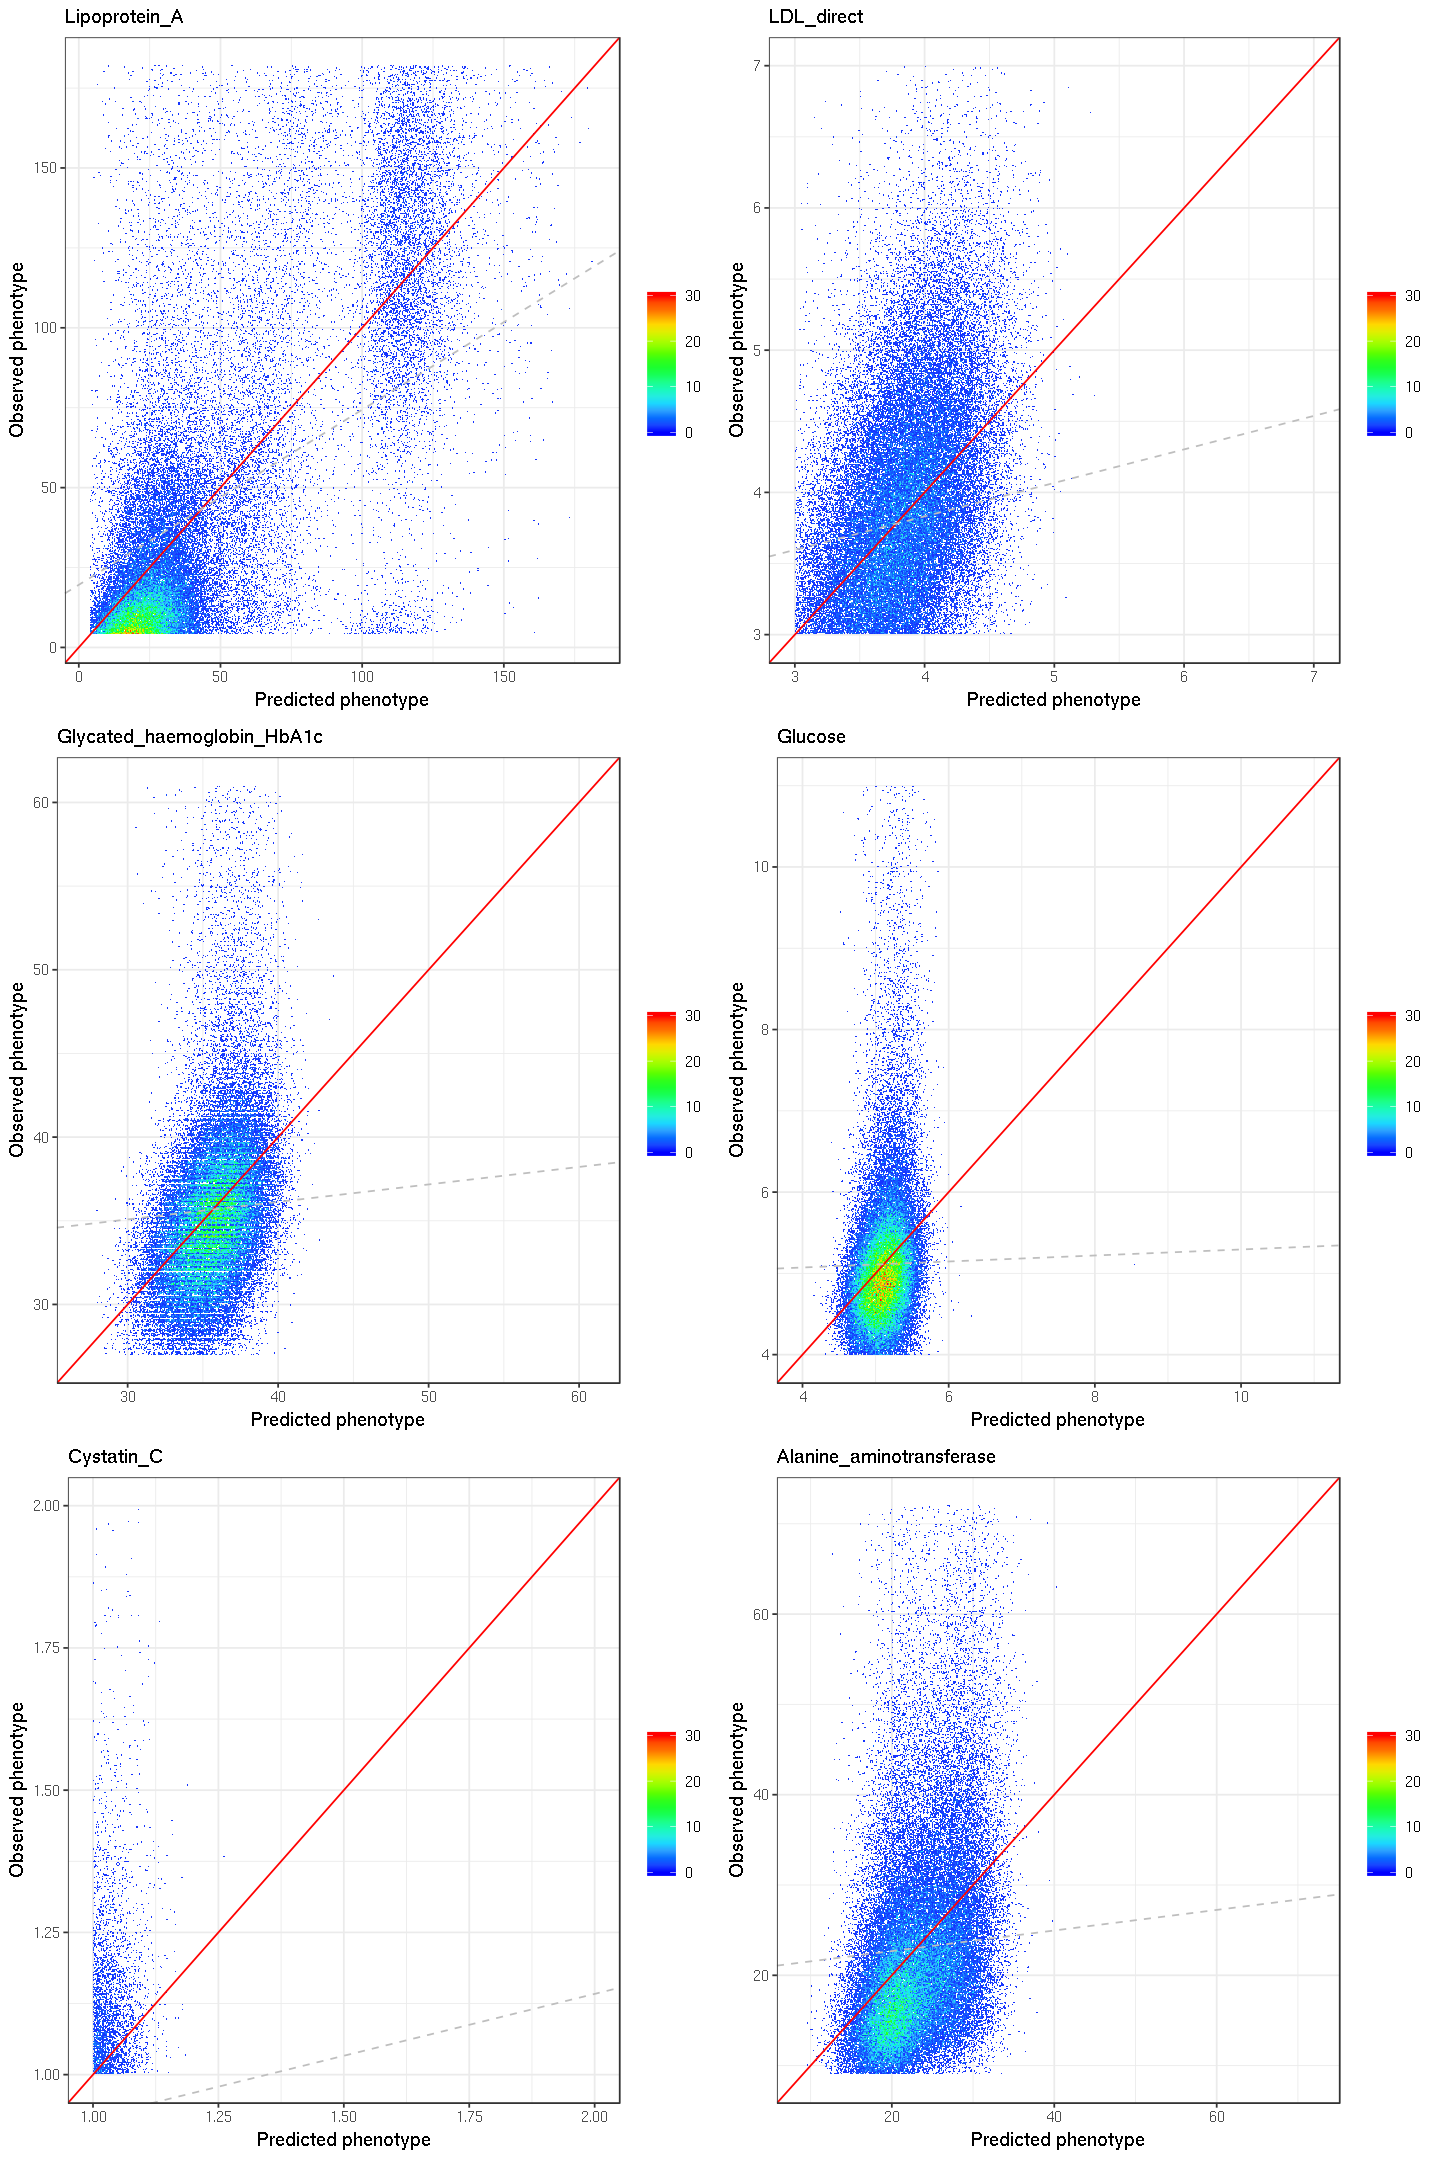

In [39]:
plot_width <- 12
plot_height <- 18
n_geom_hex_bins = 400
color_limits = c(0, 30)
options(repr.plot.width=plot_width , repr.plot.height=plot_height)
grid.arrange(
    data_list[['Lipoprotein_A']]              %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='Lipoprotein_A'),
    data_list[['LDL_direct']]                 %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='LDL_direct'),
    data_list[['Glycated_haemoglobin_HbA1c']] %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='Glycated_haemoglobin_HbA1c'),
    data_list[['Glucose']]                    %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='Glucose'),  
    data_list[['Cystatin_C']]                 %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='Cystatin_C'),      
    data_list[['Alanine_aminotransferase']]   %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='Alanine_aminotransferase'),
    widths = c(1, 1), nrow = 3
)


Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_text_repel).”

[1] "saving the results to ..."
[1] "biomarker_paper/snpnet_combined_all_1.pdf"


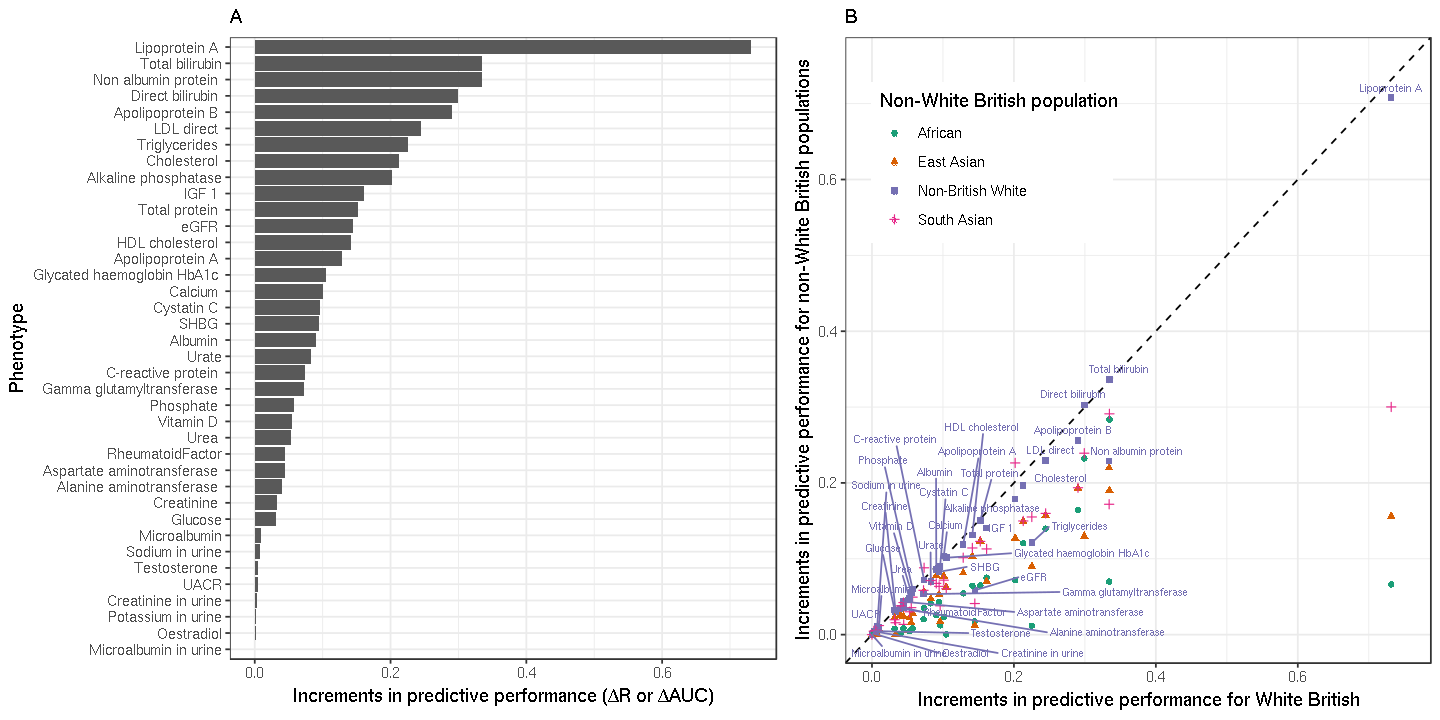

In [166]:
plot_width <- 12
plot_height <- 6
options(repr.plot.width=plot_width , repr.plot.height=plot_height)
p_combined <- grid.arrange(
    p1  + labs(title='A'), 
    p2  + labs(title='B'), 
    widths = c(1.2, 1), nrow = 1
)
print('saving the results to ...')
out_f <- file.path(out_dir, 'snpnet_combined_all_1.pdf')
print(out_f)
ggsave(out_f, p_combined, width=plot_width, height=plot_height)    


In [167]:
out_f <- file.path(out_dir, 'snpnet_combined_all_1.png')
print(out_f)
ggsave(out_f, p_combined, width=plot_width, height=plot_height)    


[1] "biomarker_paper/snpnet_combined_all_1.png"


Warning message:
“Removed 1680 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 12001 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 19 rows containing missing values (geom_hex).”Warning message:
“Removed 1755 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 42 rows containing missing values (geom_hex).”

[1] "saving the results to ..."
[1] "biomarker_paper/snpnet_combined_all_2.pdf"


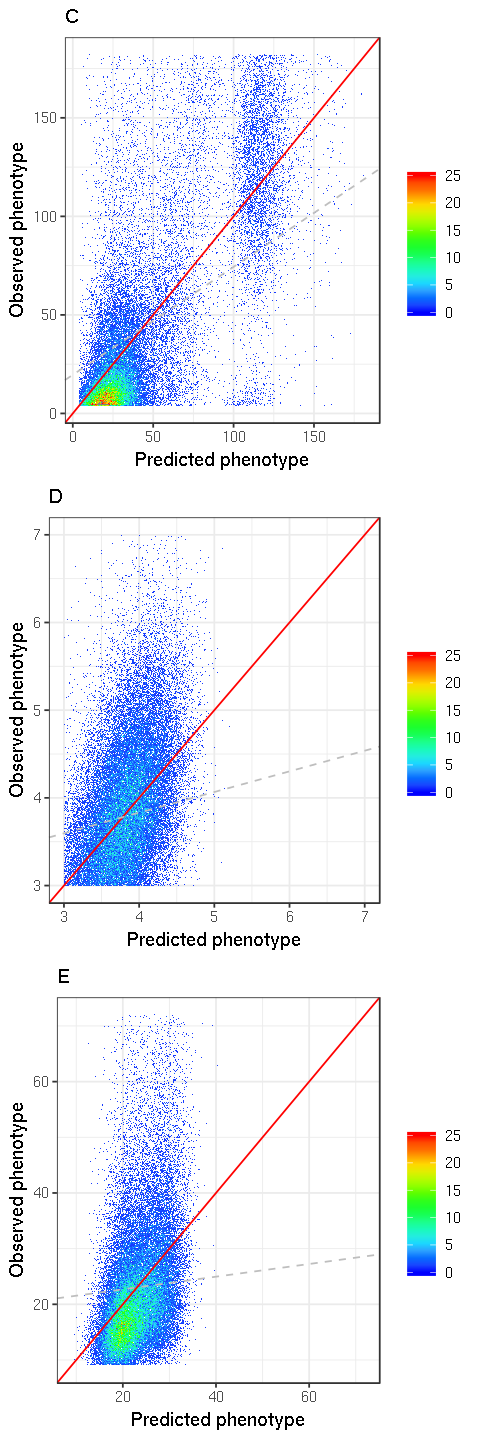

In [41]:
plot_width <- 4
plot_height <- 12
n_geom_hex_bins = 350
color_limits = c(0, 25)

options(repr.plot.width=plot_width , repr.plot.height=plot_height)
p_combined <- grid.arrange(
    data_list[['Lipoprotein_A']]              %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='C'),
    data_list[['LDL_direct']]                 %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='D'),
    data_list[['Alanine_aminotransferase']]   %>% plot_scatter(n_geom_hex_bins, color_limits) + labs(title='E'),    
    widths = c(1), nrow = 3
)
print('saving the results to ...')
out_f <- file.path(out_dir, 'snpnet_combined_all_2.pdf')
print(out_f)
ggsave(out_f, p_combined, width=plot_width, height=plot_height)    


In [42]:
out_f <- file.path(out_dir, 'snpnet_combined_all_2.png')
print(out_f)
ggsave(out_f, p_combined, width=plot_width, height=plot_height)    


[1] "biomarker_paper/snpnet_combined_all_2.png"
